In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #시각화 추가 기능(색, 화면 나눔)

from matplotlib import font_manager, rc # 한글 처리
f_path = 'C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=f_path).get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

### 2020년 계절별 각 역의 장애인 하차 인원 구하기

In [3]:
dfB1 = pd.read_csv('../Project3 Data/B1.csv')
dfB1

,호선,역번호,역명,구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,1,150,서울역,승차,47463.0,35637.0,30467.0,33290.0,36989.0,36283.0,37620.0,33193.0,31074.0,36224.0,35634.0,30668.0
1,1,150,서울역,하차,44022.0,33305.0,27909.0,30762.0,34377.0,33805.0,34928.0,30773.0,29014.0,33547.0,33058.0,28136.0
2,1,151,시청,승차,18060.0,13989.0,10710.0,10790.0,11791.0,11877.0,13475.0,11411.0,9948.0,11600.0,11959.0,10279.0
3,1,151,시청,하차,17741.0,13488.0,10441.0,10388.0,11213.0,11364.0,12910.0,10591.0,9169.0,10721.0,10954.0,9528.0
4,1,152,종각,승차,27936.0,22166.0,18213.0,19824.0,22019.0,22213.0,23958.0,19927.0,17864.0,20711.0,20808.0,17488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,8,2825,신흥,하차,9095.0,7443.0,5958.0,6238.0,7144.0,6851.0,6931.0,6189.0,5973.0,6570.0,6719.0,6201.0
556,8,2826,수진,승차,9523.0,7280.0,5517.0,5928.0,6889.0,6439.0,7151.0,6187.0,5971.0,6735.0,6825.0,6044.0
557,8,2826,수진,하차,8908.0,6832.0,5143.0,5548.0,6262.0,6112.0,6823.0,5731.0,5700.0,6374.0,6498.0,5605.0
558,8,2827,모란,승차,8837.0,6867.0,5988.0,6820.0,7554.0,7209.0,7733.0,6714.0,6780.0,7708.0,7173.0,6430.0


In [4]:
dfB1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   호선      560 non-null    int64  
 1   역번호     560 non-null    int64  
 2   역명      560 non-null    object 
 3   구분      560 non-null    object 
 4   1월      550 non-null    float64
 5   2월      550 non-null    float64
 6   3월      550 non-null    float64
 7   4월      550 non-null    float64
 8   5월      550 non-null    float64
 9   6월      550 non-null    float64
 10  7월      550 non-null    float64
 11  8월      554 non-null    float64
 12  9월      554 non-null    float64
 13  10월     554 non-null    float64
 14  11월     554 non-null    float64
 15  12월     554 non-null    float64
dtypes: float64(12), int64(2), object(2)
memory usage: 70.1+ KB


In [5]:
dfB1_2 = dfB1[dfB1['구분'] == '하차'].loc[:,['호선','역명','3월','6월','9월','12월']].dropna()
dfB1_2['호선'] = dfB1_2['호선'].astype('str')
dfB1_2

,호선,역명,3월,6월,9월,12월
1,1,서울역,27909.0,33805.0,29014.0,28136.0
3,1,시청,10441.0,11364.0,9169.0,9528.0
5,1,종각,17049.0,20830.0,16890.0,16240.0
7,1,종로3가,30053.0,35501.0,31186.0,27417.0
9,1,종로5가,22017.0,27477.0,23745.0,22546.0
...,...,...,...,...,...,...
551,8,남한산성입구,9243.0,11081.0,10354.0,10128.0
553,8,단대오거리,8842.0,10119.0,9326.0,9437.0
555,8,신흥,5958.0,6851.0,5973.0,6201.0
557,8,수진,5143.0,6112.0,5700.0,5605.0


In [6]:
dfB1_2[dfB1_2.duplicated(['역명'])]
# 중복의 이유 - 2개 이상의 호선이 존재하는 역의 하차 승객수를 각각 따로 기록해줬음.
# 예를 들면, '건대입구'역은 2호선과 7호선을 따로 기록을 해줬음.
# 구하고자 하는것이 각 역의 한달간 총 하차인원이기 때문에 그대로 합쳐주면 됨.

,호선,역명,3월,6월,9월,12월
21,2,시청,7541.0,8720.0,6923.0,7216.0
111,2,신설동,4147.0,4764.0,4163.0,3806.0
141,3,종로3가,8932.0,10321.0,9143.0,8903.0
143,3,을지로3가,5635.0,6520.0,5619.0,5709.0
163,3,교대,4137.0,5040.0,4054.0,4146.0
213,4,동대문,17830.0,21078.0,17297.0,17394.0
215,4,동대문역사문화공원,7398.0,8539.0,7242.0,7221.0
223,4,서울역,7057.0,8674.0,7147.0,7029.0
237,4,사당,8097.0,10498.0,8038.0,7668.0
267,5,영등포구청,2678.0,3140.0,2884.0,2722.0


In [7]:
dfB1_3 = dfB1_2.groupby('역명').sum()
dfB1_3

,3월,6월,9월,12월
역명,,,,
가락시장,12330.0,14130.0,13820.0,13048.0
가산디지털단지,16332.0,19559.0,17250.0,17280.0
강남,22563.0,25186.0,20927.0,21573.0
강남구청,5111.0,6054.0,5021.0,5033.0
강동,10895.0,12967.0,10811.0,11012.0
...,...,...,...,...
홍제,12986.0,15258.0,14012.0,13807.0
화곡,18146.0,20744.0,18242.0,17724.0
화랑대,5023.0,6264.0,5583.0,5021.0


### 2020년 계절별 각 역의 총 하차 인원 구하기

In [8]:
dfA8 = pd.read_csv('../project3/A8.csv')
dfA8

,역명,호선,3월,6월,9월,12월
0,서울역,1,780839.0,1073229.0,844702.0,801901.0
1,시청,1,446643.0,524974.0,426557.0,425986.0
2,종각,1,731236.0,937979.0,683803.0,644357.0
3,종로3가,1,532725.0,657555.0,506907.0,455737.0
4,종로5가,1,475923.0,592830.0,494083.0,464017.0
...,...,...,...,...,...,...
297,구반포,9,54587.0,74899.0,59465.0,58256.0
298,신반포,9,52289.0,73179.0,61210.0,61523.0
299,고속터미널,9,281079.0,418872.0,334465.0,309015.0
300,사평,9,52432.0,74709.0,63147.0,62584.0


In [9]:
dfA8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   역명      302 non-null    object 
 1   호선      302 non-null    int64  
 2   3월      300 non-null    float64
 3   6월      300 non-null    float64
 4   9월      300 non-null    float64
 5   12월     300 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 14.3+ KB


In [10]:
dfA8['호선'] = dfA8['호선'].astype('str')
dfA8.dropna()

,역명,호선,3월,6월,9월,12월
0,서울역,1,780839.0,1073229.0,844702.0,801901.0
1,시청,1,446643.0,524974.0,426557.0,425986.0
2,종각,1,731236.0,937979.0,683803.0,644357.0
3,종로3가,1,532725.0,657555.0,506907.0,455737.0
4,종로5가,1,475923.0,592830.0,494083.0,464017.0
...,...,...,...,...,...,...
297,구반포,9,54587.0,74899.0,59465.0,58256.0
298,신반포,9,52289.0,73179.0,61210.0,61523.0
299,고속터미널,9,281079.0,418872.0,334465.0,309015.0
300,사평,9,52432.0,74709.0,63147.0,62584.0


In [11]:
dfA8[dfA8.duplicated(['역명'])]
# 중복의 이유 - 이전과 같은 이유

,역명,호선,3월,6월,9월,12월
10,시청,2,494825.0,560521.0,457437.0,446700.0
55,신설동,2,78667.0,90156.0,78626.0,76653.0
70,종로3가,3,260786.0,305223.0,244907.0,229136.0
71,을지로3가,3,233665.0,280895.0,223601.0,216832.0
81,교대,3,194595.0,241404.0,190210.0,186395.0
106,동대문,4,455235.0,553806.0,463607.0,445602.0
107,동대문역사문화공원,4,323962.0,372216.0,311138.0,302810.0
108,충무로,4,603567.0,699255.0,584119.0,574084.0
111,서울역,4,301875.0,419132.0,314456.0,299056.0
118,사당,4,470678.0,584296.0,464728.0,427952.0


In [12]:
dfA8 = dfA8.groupby('역명').sum()
dfA8

,3월,6월,9월,12월
역명,,,,
가락시장,381963.0,453515.0,413338.0,393355.0
가산디지털단지,941200.0,1036810.0,972113.0,981172.0
가양,422991.0,509694.0,433101.0,426598.0
강남,1909749.0,2270288.0,1687506.0,1561490.0
강남구청,384351.0,418929.0,381921.0,371997.0
...,...,...,...,...
화곡,598853.0,639636.0,592146.0,592545.0
화랑대,187995.0,219703.0,198171.0,192901.0
회현,515441.0,650085.0,514401.0,506576.0


### 두 데이터 병합

In [13]:
dfA8B1 = pd.merge(dfA8, dfB1_3, on='역명')
dfA8B1

,3월_x,6월_x,9월_x,12월_x,3월_y,6월_y,9월_y,12월_y
역명,,,,,,,,
가락시장,381963.0,453515.0,413338.0,393355.0,12330.0,14130.0,13820.0,13048.0
가산디지털단지,941200.0,1036810.0,972113.0,981172.0,16332.0,19559.0,17250.0,17280.0
강남,1909749.0,2270288.0,1687506.0,1561490.0,22563.0,25186.0,20927.0,21573.0
강남구청,384351.0,418929.0,381921.0,371997.0,5111.0,6054.0,5021.0,5033.0
강동,388682.0,457032.0,400348.0,406606.0,10895.0,12967.0,10811.0,11012.0
...,...,...,...,...,...,...,...,...
홍제,363077.0,443170.0,380441.0,370477.0,12986.0,15258.0,14012.0,13807.0
화곡,598853.0,639636.0,592146.0,592545.0,18146.0,20744.0,18242.0,17724.0
화랑대,187995.0,219703.0,198171.0,192901.0,5023.0,6264.0,5583.0,5021.0


In [14]:
dfA8B1['3월비율'] = (dfA8B1['3월_y'])*100/dfA8B1['3월_x']
dfA8B1['6월비율'] = (dfA8B1['6월_y'])*100/dfA8B1['6월_x']
dfA8B1['9월비율'] = (dfA8B1['9월_y'])*100/dfA8B1['9월_x']
dfA8B1['12월비율'] = (dfA8B1['12월_y'])*100/dfA8B1['12월_x']
dfA8B1['연간비율'] = (dfA8B1['3월_y']+dfA8B1['6월_y']+dfA8B1['9월_y']+dfA8B1['12월_y'])*100/(dfA8B1['3월_x']+dfA8B1['6월_x']+dfA8B1['9월_x']+dfA8B1['12월_x'])
dfA8B1

,3월_x,6월_x,9월_x,12월_x,3월_y,6월_y,9월_y,12월_y,3월비율,6월비율,9월비율,12월비율,연간비율
역명,,,,,,,,,,,,,
가락시장,381963.0,453515.0,413338.0,393355.0,12330.0,14130.0,13820.0,13048.0,3.228061,3.115663,3.343511,3.317105,3.247408
가산디지털단지,941200.0,1036810.0,972113.0,981172.0,16332.0,19559.0,17250.0,17280.0,1.735232,1.886459,1.774485,1.761159,1.791293
강남,1909749.0,2270288.0,1687506.0,1561490.0,22563.0,25186.0,20927.0,21573.0,1.181464,1.109375,1.240114,1.381565,1.214815
강남구청,384351.0,418929.0,381921.0,371997.0,5111.0,6054.0,5021.0,5033.0,1.329774,1.445114,1.314670,1.352968,1.362640
강동,388682.0,457032.0,400348.0,406606.0,10895.0,12967.0,10811.0,11012.0,2.803063,2.837219,2.700401,2.708273,2.764318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
홍제,363077.0,443170.0,380441.0,370477.0,12986.0,15258.0,14012.0,13807.0,3.576652,3.442923,3.683094,3.726817,3.600325
화곡,598853.0,639636.0,592146.0,592545.0,18146.0,20744.0,18242.0,17724.0,3.030126,3.243095,3.080659,2.991165,3.089164
화랑대,187995.0,219703.0,198171.0,192901.0,5023.0,6264.0,5583.0,5021.0,2.671880,2.851122,2.817264,2.602890,2.740589


In [15]:
dfA8B1 = dfA8B1.loc[:,['3월비율','6월비율','9월비율','12월비율','연간비율']]
dfA8B1
#주의: 1,4,7,10월로 할 경우 1월이 코로나 이전의 데이터이기 때문에,
#코로나의 영향으로 잘못된 분석을 할 여지가 큼.

,3월비율,6월비율,9월비율,12월비율,연간비율
역명,,,,,
가락시장,3.228061,3.115663,3.343511,3.317105,3.247408
가산디지털단지,1.735232,1.886459,1.774485,1.761159,1.791293
강남,1.181464,1.109375,1.240114,1.381565,1.214815
강남구청,1.329774,1.445114,1.314670,1.352968,1.362640
강동,2.803063,2.837219,2.700401,2.708273,2.764318
...,...,...,...,...,...
홍제,3.576652,3.442923,3.683094,3.726817,3.600325
화곡,3.030126,3.243095,3.080659,2.991165,3.089164
화랑대,2.671880,2.851122,2.817264,2.602890,2.740589


In [16]:
dfA8B1.sort_values(by='연간비율', ascending=False)

,3월비율,6월비율,9월비율,12월비율,연간비율
역명,,,,,
동묘앞,6.468065,6.381465,6.540165,6.360477,6.436689
제기동,6.173441,5.973441,6.101267,5.917721,6.039921
청량리,6.198273,5.836685,6.178179,5.955039,6.035364
모란,5.942612,5.835249,6.210552,5.916950,5.975173
신흥,5.524903,5.690577,5.413906,5.487853,5.532684
...,...,...,...,...,...
홍대입구,1.158615,1.149314,1.217471,1.323906,1.204025
신사,1.155125,1.094021,1.165943,1.230393,1.156738
당산,1.064461,1.018352,1.047087,1.047483,1.043002


In [17]:
# dfA8B1_2 = dfA8B1.transpose()

In [18]:
dfA8B1.to_csv('Rdata.csv', mode='w')

### 파이차트 그리기 - 각 역의 계절별 장애인 하차 수

In [19]:
# 차트의 형식을 맞추기위해 transpose로 행-열 전환
dfB1_3 = dfB1_3.transpose()

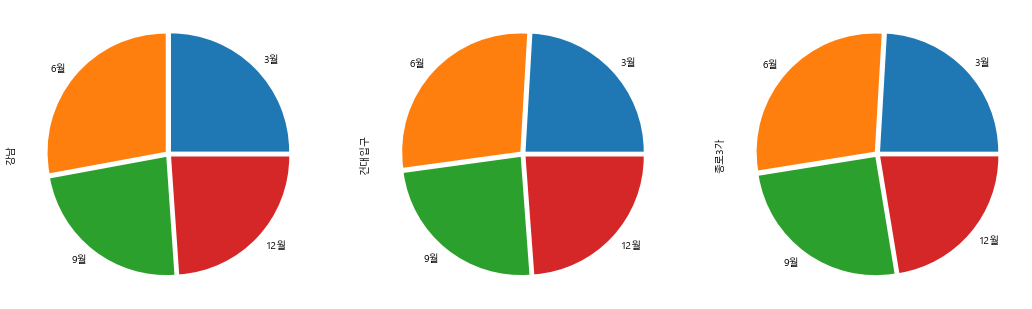

In [20]:
# 장애인 월별 하차 수 데이터를 파이차트로 그려봄
f, ax = plt.subplots(1, 3, figsize=(18, 6))
dfB1_3['강남'].plot.pie(explode=[0.03, 0.03, 0.03, 0.03], ax = ax[0])
dfB1_3['건대입구'].plot.pie(explode=[0.03, 0.03, 0.03, 0.03], ax = ax[1])
dfB1_3['종로3가'].plot.pie(explode=[0.03, 0.03, 0.03, 0.03], ax = ax[2])
plt.show()